### Libraries

In [1]:
import nltk

In [2]:
import re

In [3]:
import csv

In [4]:
import pprint

In [5]:
import pandas as pd

In [6]:
from urllib import request

In [7]:
from bs4 import BeautifulSoup

In [8]:
from nltk.corpus import stopwords

In [9]:
from nltk import FreqDist

In [10]:
from nltk import sent_tokenize, word_tokenize, PorterStemmer

In [11]:
from scipy.stats import ttest_rel

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [16]:
# visualisation
import seaborn as sns

In [17]:
from matplotlib import pyplot as plt

In [18]:
import plotly.express as px

In [19]:
import plotly.graph_objects as go

In [20]:
from plotly.subplots import make_subplots

### Open the mental health csv file

In [21]:
data = open('mental_health.csv', 'r')

In [22]:
text = []

In [23]:
for row in csv.reader(data):
    text.append((nltk.word_tokenize(row[0]),row[1]))

In [24]:
text

[(['text'], 'label'),
 (['dear',
   'american',
   'teens',
   'question',
   'dutch',
   'person',
   'heard',
   'guys',
   'get',
   'way',
   'easier',
   'things',
   'learn',
   'age',
   'us',
   'sooooo',
   'thth',
   'graders',
   'like',
   'right',
   'guys',
   'learn',
   'math'],
  '0'),
 (['nothing',
   'look',
   'forward',
   'lifei',
   'dont',
   'many',
   'reasons',
   'keep',
   'going',
   'feel',
   'like',
   'nothing',
   'keeps',
   'going',
   'next',
   'day',
   'makes',
   'want',
   'hang',
   'myself'],
  '1'),
 (['music',
   'recommendations',
   'im',
   'looking',
   'expand',
   'playlist',
   'usual',
   'genres',
   'alt',
   'pop',
   'minnesota',
   'hip',
   'hop',
   'steampunk',
   'various',
   'indie',
   'genres',
   'artists',
   'people',
   'like',
   'cavetown',
   'aliceband',
   'bug',
   'hunter',
   'penelope',
   'scott',
   'various',
   'rhymesayers',
   'willing',
   'explore',
   'new',
   'genresartists',
   'such',
   'anyt

In [25]:
df = pd.DataFrame(text, columns=['Tokenized Text', 'Label'])

In [26]:
pd.set_option('display.max_colwidth', None)

In [27]:
df.head(51)

,Tokenized Text,Label
0,[text],label
1,"[dear, american, teens, question, dutch, person, heard, guys, get, way, easier, things, learn, age, us, sooooo, thth, graders, like, right, guys, learn, math]",0
2,"[nothing, look, forward, lifei, dont, many, reasons, keep, going, feel, like, nothing, keeps, going, next, day, makes, want, hang, myself]",1
3,"[music, recommendations, im, looking, expand, playlist, usual, genres, alt, pop, minnesota, hip, hop, steampunk, various, indie, genres, artists, people, like, cavetown, aliceband, bug, hunter, penelope, scott, various, rhymesayers, willing, explore, new, genresartists, such, anything, generic, rap, the, type, exclusively, sex, drugs, cool, rapper, is, rap, types, pretty, good, pop, popular, couple, years, ago, dunno, technical, genre, name, anyways, anyone, got, music, recommendations, favorite, artistssongs]",0
4,"[im, done, trying, feel, betterthe, reason, im, still, alive, know, mum, devastated, ever, killed, myself, ever, passes, im, still, state, im, going, hesitate, ending, life, shortly, after, im, almost, take, meds, go, therapy, nothing, seems, help, enough, dont, want, around, anymore, hate, feeling, like, this, wouldnt, wish, upon, enemy, brain, feels, like, constantly, like, static, tv, wont, shut, overthinking, do, think, im, running, options, dont, see, living, past, got, accepted, health, science, degree, dont, even, know, wan, na, try, know, im, smart, mental, illness, holds, back, think, cant, anything, im, good, enough, need, fucking, help, dont, know, anymore, ive, run, ...]",1
5,"[worried, year, old, girl, subject, domestic, physicalmental, housewithout, going, lot, know, girl, know, girl, etc, let, give, brief, background, known, girl, years, lives, uk, live, different, country, kept, touch, electronic, means, first, girl, schizophrenic, host, illnesses, too, dad, severe, anger, issues, abuses, physically, mentally, makes, serve, food, wash, dishes, clean, house, shouts, beats, petty, things, like, spilling, water, picking, toys, floor, threatened, knife, beats, plates, glasses, punches, head, last, time, got, beat, around, month, ago, one, siblings, gets, beat, up, tried, tell, mother, beating, showed, bruises, too, mother, refuses, believe, even, laughed, off, probably, fear, confronting, him, husband, yells, wife, ...]",1
6,"[hey, rredflag, sure, right, place, post, this, goes, im, currently, student, intern, sandia, national, labs, working, survey, help, improve, marketing, outreach, efforts, many, schools, recruit, around, country, were, looking, current, undergradgrad, stem, students, stem, student, know, stem, students, would, greatly, appreciate, help, take, pass, along, short, survey, thank, you, everyone, helps, take, survey, entered, drawing, chance, win, one, three, amazon, gcs]",1
7,"[feel, like, someone, needs, hear, tonight, feeling, right, think, cant, anything, people, keep, puting, listen, this, its, your, life, everyone, else, living, it, someone, tells, unable, something, work, get, done, say, wrong, someone, says, youl, never, make, it, work, hard, make, end, one, make, it, could, make, putting, people, like, that, see, life, nobody, tell, cant, do, one, tell, live, where, love, look, end, let, climb, height, hope, someone, needed, hear, tonight, beutiful, life, good, night, sincerely, austin, zippy]",0
8,"[deserve, liveif, died, right, noone, would, carei, real, friendsi, always, start, conversations, get, dry, responses, i, feel, comfortable, around, females, emotional, abuse, mom, put, left, usi, never, find, love, i, keep, getting, reminded, everyday, failure, disappointment, parents, compared, siblingsi, first, suicidal, thought, afraid, grades, good, enough, parents, this, probably, end, soon]",1
9,"[feels, good, ive, set, dateim, killing, friday, nice, finally, know, im, gon, na, it, bye]",1


In [28]:
labels = [label for _, label in text]

In [29]:
sizes = [labels.count('0'), labels.count('1')]

In [30]:
custom_colours = ['#ff7675', '#74b9ff']

In [31]:
plt.figure(figsize=(20, 6), dpi=227)

<Figure size 4540x1362 with 0 Axes>

<Figure size 4540x1362 with 0 Axes>

<AxesSubplot:>

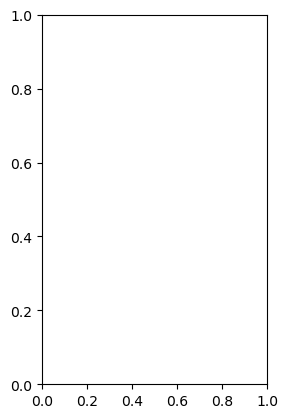

In [32]:
plt.subplot(1, 2, 1)

([<matplotlib.patches.Wedge at 0x1d28f897b20>,
 [Text(-0.692725308568751, -0.8544774115612004, '0'),
  Text(0.724212738956199, 0.8933173617105852, '1')],
 [Text(-0.3778501683102278, -0.46607858812429104, '51%'),
  Text(0.4093376350621994, 0.5049185087929393, '49%')])

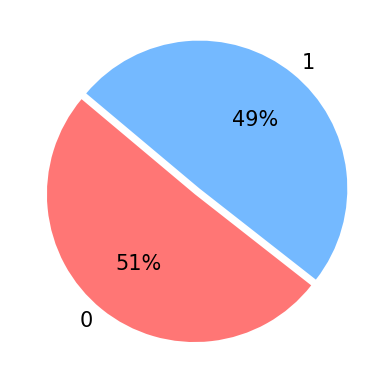

In [33]:
plt.pie(sizes, labels=['0', '1'], textprops={'fontsize': 15}, startangle=140, autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

<AxesSubplot:>

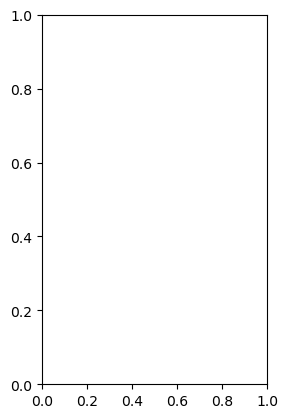

In [34]:
plt.subplot(1, 2, 2)

<AxesSubplot:>

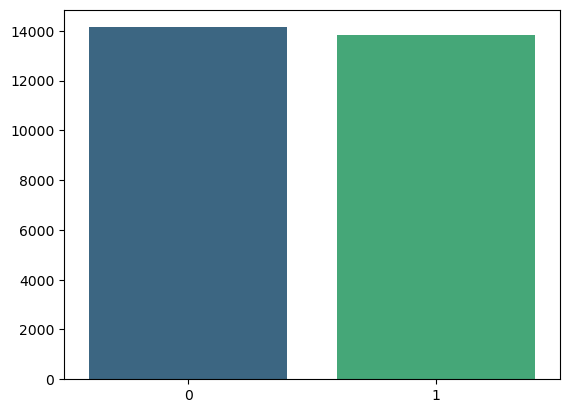

In [35]:
sns.barplot(x=['0', '1'], y=sizes, palette='viridis')

In [36]:
plt.show()

In [37]:
total_words = [len(words) for words, _ in text]

In [38]:
labels = [label for _, label in text]

In [39]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

C:\Users\savla\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

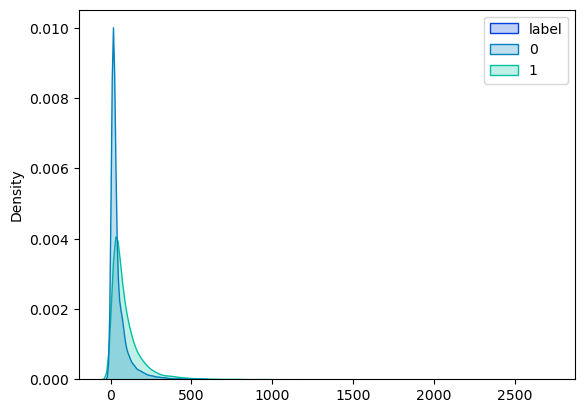

In [40]:
sns.kdeplot(x=total_words, hue=labels, palette='winter', shade=True)

In [41]:
plt.show()

### Text Preprocessing

In [42]:
stopwords=nltk.corpus.stopwords.words('english')

In [43]:
all_words = [word.lower() for words, _ in text for word in words if word.isalpha() and word.lower() not in stopwords]

In [44]:
all_words

['text',
 'dear',
 'american',
 'teens',
 'question',
 'dutch',
 'person',
 'heard',
 'guys',
 'get',
 'way',
 'easier',
 'things',
 'learn',
 'age',
 'us',
 'sooooo',
 'thth',
 'graders',
 'like',
 'right',
 'guys',
 'learn',
 'math',
 'nothing',
 'look',
 'forward',
 'lifei',
 'dont',
 'many',
 'reasons',
 'keep',
 'going',
 'feel',
 'like',
 'nothing',
 'keeps',
 'going',
 'next',
 'day',
 'makes',
 'want',
 'hang',
 'music',
 'recommendations',
 'im',
 'looking',
 'expand',
 'playlist',
 'usual',
 'genres',
 'alt',
 'pop',
 'minnesota',
 'hip',
 'hop',
 'steampunk',
 'various',
 'indie',
 'genres',
 'artists',
 'people',
 'like',
 'cavetown',
 'aliceband',
 'bug',
 'hunter',
 'penelope',
 'scott',
 'various',
 'rhymesayers',
 'willing',
 'explore',
 'new',
 'genresartists',
 'anything',
 'generic',
 'rap',
 'type',
 'exclusively',
 'sex',
 'drugs',
 'cool',
 'rapper',
 'rap',
 'types',
 'pretty',
 'good',
 'pop',
 'popular',
 'couple',
 'years',
 'ago',
 'dunno',
 'technical',
 'ge

In [45]:
freq_dist = FreqDist(all_words)

In [46]:
pprint.pprint(freq_dist.most_common(50))

[('im', 34720),
 ('like', 22300),
 ('want', 17299),
 ('know', 15475),
 ('feel', 14508),
 ('life', 14386),
 ('get', 13094),
 ('one', 12405),
 ('even', 11497),
 ('ive', 11287),
 ('people', 11249),
 ('would', 11001),
 ('time', 10829),
 ('cant', 10446),
 ('really', 10187),
 ('think', 8615),
 ('never', 8031),
 ('going', 7959),
 ('go', 7898),
 ('dont', 7829),
 ('much', 7546),
 ('friends', 7071),
 ('day', 6944),
 ('good', 6799),
 ('help', 6534),
 ('years', 6480),
 ('make', 5971),
 ('things', 5936),
 ('got', 5907),
 ('way', 5779),
 ('see', 5776),
 ('could', 5649),
 ('br', 5610),
 ('still', 5400),
 ('back', 5349),
 ('anything', 5304),
 ('someone', 5117),
 ('love', 5069),
 ('something', 4986),
 ('anymore', 4972),
 ('always', 4942),
 ('fucking', 4931),
 ('better', 4812),
 ('end', 4754),
 ('family', 4753),
 ('everything', 4745),
 ('school', 4713),
 ('every', 4713),
 ('need', 4666),
 ('nothing', 4619)]


In [47]:
top_words = freq_dist.most_common(50)

In [48]:
words, frequencies = zip(*top_words)

In [49]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<BarContainer object of 50 artists>

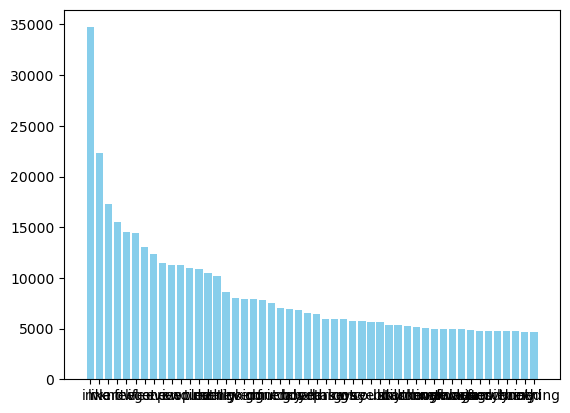

In [50]:
plt.bar(words, frequencies, color='skyblue')

Text(0.5, 1.0, 'Top 50 Most Frequent Words')

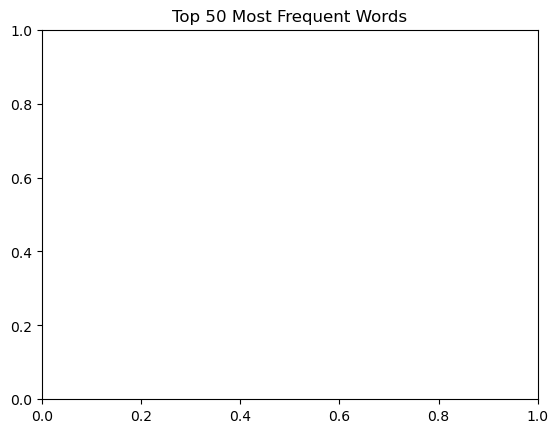

In [51]:
plt.title('Top 50 Most Frequent Words')

Text(0.5, 0, 'Word')

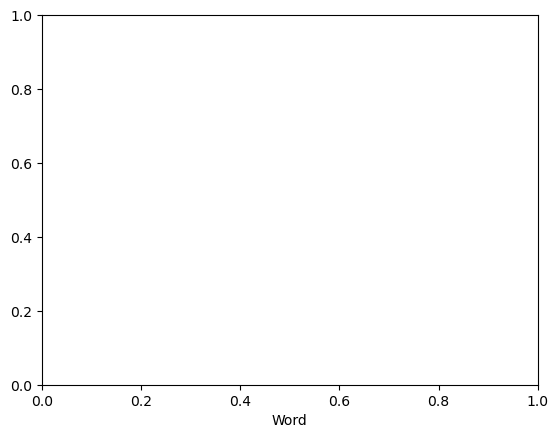

In [52]:
plt.xlabel('Word')

Text(0, 0.5, 'Frequency')

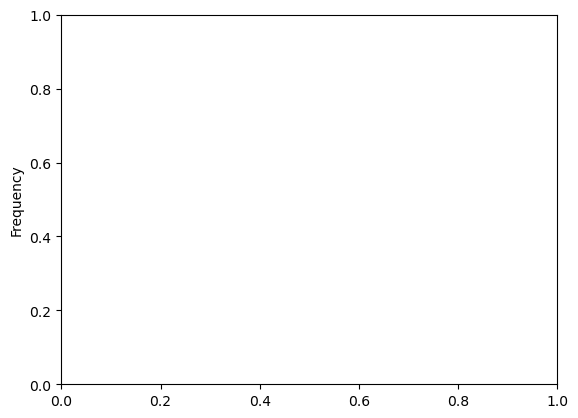

In [53]:
plt.ylabel('Frequency')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

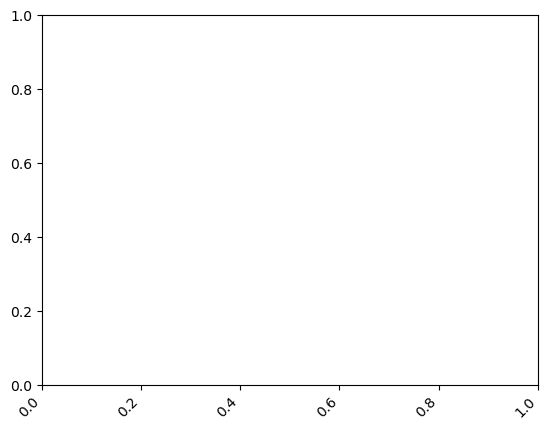

In [54]:
plt.xticks(rotation=45, ha='right')

In [55]:
plt.show()

In [56]:
def preprocess(text):
    wnl = nltk.WordNetLemmatizer()
    return [wnl.lemmatize(w.lower()) for w in text if w.lower() not in stopwords]

In [57]:
preprocessed_data = [(preprocess(chat),label) for (chat,label) in text]

### Classification

In [58]:
X = [' '.join(words) for words, _ in preprocessed_data]

In [59]:
y = [label for _, label in preprocessed_data]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [61]:
vectorizer = CountVectorizer()

In [62]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [63]:
X_test_vectorized = vectorizer.transform(X_test)

In [64]:
classifier = MultinomialNB()

In [65]:
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [66]:
y_pred = classifier.predict(X_test_vectorized)

In [67]:
y_prob = classifier.predict_proba(X_test_vectorized)[:, 1]

In [68]:
print(accuracy_score(y_test, y_pred))

0.8370264474624732


In [69]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      1423
           1       0.76      0.98      0.86      1375
       label       0.00      1.00      0.00         0

    accuracy                           0.84      2798
   macro avg       0.58      0.89      0.56      2798
weighted avg       0.87      0.84      0.83      2798



In [70]:
classes = ['0', '1']

In [71]:
unique_labels = set(y_test)

In [72]:
if 'label' in unique_labels:
    unique_labels.remove('label')

C:\Users\savla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


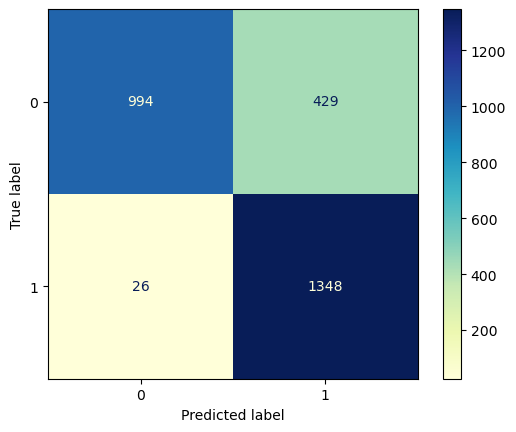

In [73]:
plot_confusion_matrix(classifier, X_test_vectorized, y_test, cmap='YlGnBu', display_labels=classes, labels=list(unique_labels))

In [74]:
plt.show()

In [75]:
word_features = list(set([word for words, _ in text for word in words]))[:1000]

In [76]:
#word_features

In [77]:
def document_features(words): 
    document_words = set(words)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [78]:
featuresets = [(document_features(d), c) for (d,c) in text]

In [79]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [80]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [81]:
print(nltk.classify.accuracy(classifier, test_set))

0.54


In [82]:
classifier.show_most_informative_features(20)

Most Informative Features
        contains(filmed) = True                0 : 1      =     45.3 : 1.0
         contains(herei) = True                1 : 0      =     21.5 : 1.0
      contains(threaten) = True                1 : 0      =     20.1 : 1.0
           contains(iti) = True                1 : 0      =     15.0 : 1.0
         contains(coins) = True                0 : 1      =     13.4 : 1.0
      contains(mattered) = True                1 : 0      =     11.8 : 1.0
            contains(mr) = True                0 : 1      =     10.9 : 1.0
           contains(fox) = True                0 : 1      =     10.8 : 1.0
        contains(finale) = True                0 : 1      =      9.6 : 1.0
        contains(viable) = True                1 : 0      =      8.8 : 1.0
       contains(consume) = True                1 : 0      =      8.7 : 1.0
     contains(collapsed) = True                1 : 0      =      8.0 : 1.0
           contains(std) = True                1 : 0      =      7.8 : 1.0

In [83]:
#classifier_dt = nltk.DecisionTreeClassifier.train(train_set)

In [84]:
#print(nltk.classify.accuracy(classifier_dt, test_set))

In [85]:
classifier2 = nltk.MaxentClassifier.train(train_set)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.494
             2          -0.68219        0.524
      Training stopped: keyboard interrupt
         Final          -0.67301        0.524


In [86]:
print(nltk.classify.accuracy(classifier2, test_set))

0.46


### Sentiment Analysis

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [88]:
sa = SentimentIntensityAnalyzer()

In [89]:
def get_sentiment(preprocessed_data):
    scores = sa.polarity_scores(preprocessed_data)
    return scores['compound']

In [90]:
df['Sentiment Score'] = df['Tokenized Text'].apply(lambda x: get_sentiment(' '.join(x)))

In [91]:
df['Sentiment'] = df['Sentiment Score'].apply(lambda score: 1 if score >= 0 else 0)

In [92]:
pd.set_option('display.max_colwidth', None)

In [93]:
print(df[['Tokenized Text', 'Sentiment Score', 'Sentiment', 'Label']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Tokenized Text  \
0                                                                                                                                                                                                                                                                                               

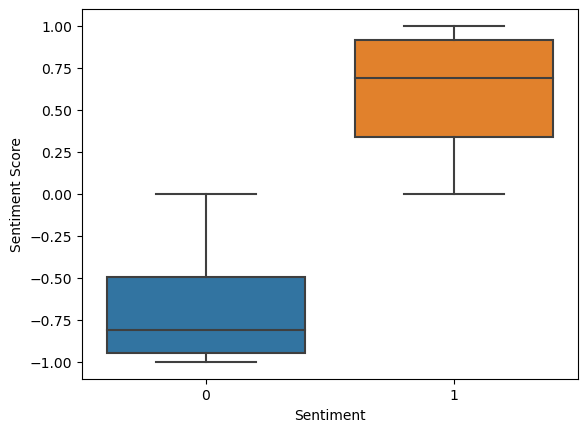

In [98]:
sentiment_col = 'Sentiment'
sns.boxplot(x=sentiment_col, y='Sentiment Score', data=df)
plt.show()